In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [7]:
import pandas as pd 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
dataset = pd.read_csv("LVL1 (EASY).csv",header=0, delimiter=';') 
dataset.head()

,Chomper_Kill,Spitter_Kill,Spike_Hit,Death_Fall,Death_Acid,Spitter_Hit,Chomper_Hit,Column_Des,Health_Pickup,Switch_Enabled,Box_Pushed,Key1_Pickup,Key2_Pickup,Key3_Pickup,Quiz_Start,Correct_Ans,Wrong_Ans
0,0,3,0,0,1,0,0,1,0,1,0,1,1,1,1,3,0
1,0,3,1,0,0,0,0,1,0,1,0,1,1,1,1,3,0
2,0,3,2,0,0,0,0,1,0,1,0,1,1,1,1,3,0
3,0,3,1,0,1,0,0,1,0,1,0,1,1,1,1,3,0
4,0,6,2,0,1,0,0,1,0,1,0,1,1,1,1,3,0


In [8]:
# selection des colonnes à prendre en compte dans l'ACP
from sklearn import preprocessing
X_dataset = dataset[["Spitter_Kill","Spike_Hit","Death_Fall","Death_Acid","Column_Des","Spitter_Hit","Key1_Pickup","Key2_Pickup","Key3_Pickup","Switch_Enabled","Quiz_Start","Correct_Ans","Wrong_Ans"]]
features = dataset.columns
# normalize the data attributes
normalized_d = preprocessing.normalize(X_dataset)
standardized_X = preprocessing.scale(normalized_d)
features

Index([u'Chomper_Kill', u'Spitter_Kill', u'Spike_Hit', u'Death_Fall',
       u'Death_Acid', u'Spitter_Hit', u'Chomper_Hit', u'Column_Des',
       u'Health_Pickup', u'Switch_Enabled', u'Box_Pushed ', u'Key1_Pickup',
       u'Key2_Pickup', u'Key3_Pickup', u'Quiz_Start', u'Correct_Ans',
       u'Wrong_Ans'],
      dtype='object')

In [9]:
print(normalized_d)
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(standardized_X)
X_scaled = std_scale.transform(standardized_X)

[[0.6        0.         0.         ... 0.2        0.6        0.        ]
 [0.6        0.2        0.         ... 0.2        0.6        0.        ]
 [0.56694671 0.37796447 0.         ... 0.18898224 0.56694671 0.        ]
 ...
 [0.61237244 0.         0.         ... 0.20412415 0.61237244 0.        ]
 [0.6        0.         0.         ... 0.2        0.6        0.2       ]
 [0.61237244 0.         0.         ... 0.20412415 0.61237244 0.        ]]


In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(2,'k-means++',500,10,0)
kmeans.fit(X_scaled)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[ 3.39956286  0.37261157  0.47526059  1.23988472 -3.77731087  0.91874172
  -0.12505316 -1.43163138 -3.77731087 -3.77731087 -3.77731087 -3.59363941
   0.20269974]
 [-0.18678917 -0.02047316 -0.02611322 -0.06812553  0.20754455 -0.05048031
   0.00687105  0.07866106  0.20754455  0.20754455  0.20754455  0.19745271
  -0.01113735]]
[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1]


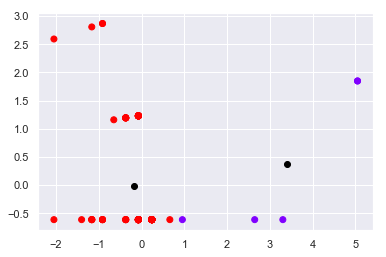

In [11]:
plt.scatter(X_scaled[:,0],X_scaled[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [11]:
corrMatrix = dataset.corr()
print (corrMatrix)

                Chomper_Kill  Spitter_Kill  Spike_Hit  Death_Fall  Death_Acid  \
Chomper_Kill             NaN           NaN        NaN         NaN         NaN   
Spitter_Kill             NaN      1.000000   0.184578    0.183531    0.526983   
Spike_Hit                NaN      0.184578   1.000000   -0.234978    0.081399   
Death_Fall               NaN      0.183531  -0.234978    1.000000    0.064150   
Death_Acid               NaN      0.526983   0.081399    0.064150    1.000000   
Spitter_Hit              NaN      0.219133  -0.089742   -0.020101    0.073499   
Chomper_Hit              NaN           NaN        NaN         NaN         NaN   
Column_Des               NaN      0.459786  -0.061095    0.321182    0.238416   
Health_Pickup            NaN           NaN        NaN         NaN         NaN   
Switch_Enabled           NaN      0.459786  -0.061095    0.321182    0.238416   
Box_Pushed               NaN           NaN        NaN         NaN         NaN   
Key1_Pickup              NaN

In [12]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch


In [13]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X_scaled)
labels = model.labels_

print(labels)

[1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1]


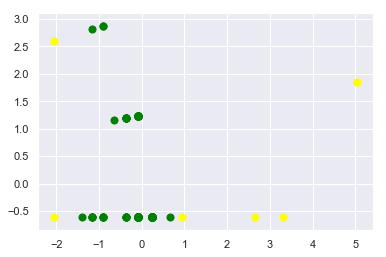

In [15]:
plt.scatter(X_scaled[labels==0, 0], X_scaled[labels==0, 1], s=50, marker='o', color='yellow')
plt.scatter(X_scaled[labels==1, 0], X_scaled[labels==1, 1], s=50, marker='o', color='green')

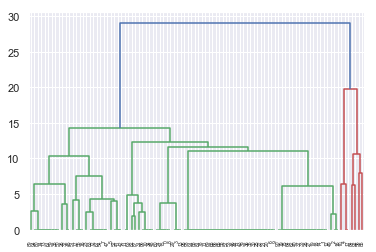

In [16]:
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

In [20]:
classe=[1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]
dataset['Classe'] = classe
dataset.to_csv(r'C:\Users\sofiane\Desktop\Master project/LVL1(EASY)_Classified.csv', index = None, header=True)